<a href="https://colab.research.google.com/github/JoSungHun/Deeplearning/blob/master/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment

* Due date: **2018/04/09 00:00** (will not accept late submission)
* Submittion format: notebook file which can be executed in Colab environment

* We want to build a multi-class classification model using Reuters dataset.

> ### Loading and preprocessing data

In [0]:
from keras.datasets import reuters

# Like IMDB, the argument num_words restricts the data to 
# the 10,000 most frequently occurring words 
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
len(x_train)

8982

> ### Building the network

In [0]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(46, activation='softmax'))
  model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

> ### Validation

* We employ *k-fold cross validation* for monitoring the performance of trained model.
* Write a code in the below to perform *10-fold cross validation*.
* **For each fold, save a model at every epoch in your Google Drive.**

In [0]:
from google.colab import drive#구글드라이브 마운트 및 파일경로 설정
from keras.callbacks import ModelCheckpoint
drive.mount('/content/gdrive')
# filepath = '/content/gdrive/My Drive/hw2_callbacks/hw2_model.(폴드).{에폭}.hdf5'
# for 문을 통해 경로 설정을 하고 싶었지만 이상하게 오류가 뜨며 안되서 스태틱하게 배열로 저장
filepath = ['/content/gdrive/My Drive/hw2_callbacks/hw2_model.0.{epoch:02d}.hdf5',
              '/content/gdrive/My Drive/hw2_callbacks/hw2_model.1.{epoch:02d}.hdf5',
              '/content/gdrive/My Drive/hw2_callbacks/hw2_model.2.{epoch:02d}.hdf5',
              '/content/gdrive/My Drive/hw2_callbacks/hw2_model.3.{epoch:02d}.hdf5',
              '/content/gdrive/My Drive/hw2_callbacks/hw2_model.4.{epoch:02d}.hdf5',
              '/content/gdrive/My Drive/hw2_callbacks/hw2_model.5.{epoch:02d}.hdf5',
              '/content/gdrive/My Drive/hw2_callbacks/hw2_model.6.{epoch:02d}.hdf5',
              '/content/gdrive/My Drive/hw2_callbacks/hw2_model.7.{epoch:02d}.hdf5',
              '/content/gdrive/My Drive/hw2_callbacks/hw2_model.8.{epoch:02d}.hdf5',
              '/content/gdrive/My Drive/hw2_callbacks/hw2_model.9.{epoch:02d}.hdf5']

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
%cd hw2_callbacks

/content/gdrive/My Drive/hw2_callbacks


In [0]:
# write a code for 10-fold cross validation here
import numpy as np
k = 10
num_val_samples = len(x_train) // k
num_epochs = 100
all_train_acc = []
all_val_acc = []
for i in range(k):
  print('처리중인 폴드 #', i)
  
  modelckpt = ModelCheckpoint(filepath=filepath[i]) 
  # 
  val_data = x_train[i * num_val_samples: (i+1) * num_val_samples]
  val_labels = one_hot_train_labels[i * num_val_samples: (i+1) * num_val_samples]
  
  partial_train_data = np.concatenate([x_train[:i * num_val_samples], x_train[(i + 1) * num_val_samples:]], axis=0)
  partial_train_labels = np.concatenate([one_hot_train_labels[:i * num_val_samples], one_hot_train_labels[(i + 1) * num_val_samples:]], axis=0)
    
  model = build_model()
  history = model.fit(partial_train_data,
                      partial_train_labels,
                      epochs=num_epochs,
                      batch_size=512,
                      validation_data=(val_data, val_labels),
                      callbacks=[modelckpt])
  
  train_acc = history.history['acc']
  val_acc = history.history['val_acc']
  
  all_train_acc.append(train_acc)
  all_val_acc.append(val_acc)

처리중인 폴드 # 0
Train on 8084 samples, validate on 898 samples
Epoch 1/100
8084/8084 [==============================] - 3s 344us/step - loss: 2.5658 - acc: 0.5391 - val_loss: 1.6928 - val_acc: 0.6470
Epoch 2/100
8084/8084 [==============================] - 1s 73us/step - loss: 1.3745 - acc: 0.7165 - val_loss: 1.3046 - val_acc: 0.7249
Epoch 3/100
8084/8084 [==============================] - 1s 73us/step - loss: 1.0312 - acc: 0.7785 - val_loss: 1.1599 - val_acc: 0.7528
Epoch 4/100
8084/8084 [==============================] - 1s 73us/step - loss: 0.8158 - acc: 0.8251 - val_loss: 1.0615 - val_acc: 0.7795
Epoch 5/100
8084/8084 [==============================] - 1s 74us/step - loss: 0.6507 - acc: 0.8637 - val_loss: 0.9983 - val_acc: 0.7817
Epoch 6/100
8084/8084 [==============================] - 1s 73us/step - loss: 0.5234 - acc: 0.8919 - val_loss: 0.9626 - val_acc: 0.8073
Epoch 7/100
8084/8084 [==============================] - 1s 74us/step - loss: 0.4192 - acc: 0.9111 - val_loss: 0.9404 - val_

* Plotting the training and validation accuracy
  * To obtain the validation accuracy at the end of every epoch, just average the performances of all folds.

In [0]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

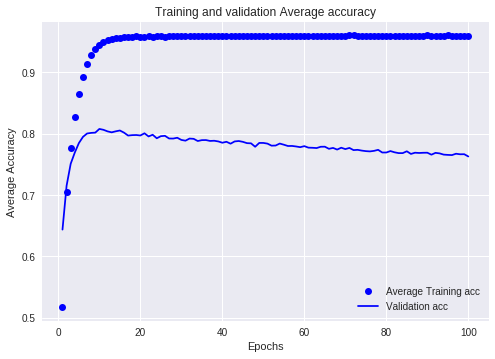

In [0]:

# write a code for plotting the training and validation accuracy
import matplotlib.pyplot as plt

# 모든 폴드의 val_acc 평균
average_val_acc = [
    np.mean([x[i] for x in all_val_acc]) for i in range(num_epochs)]
#모든 폴드의 train_acc 평균
average_train_acc = [
    np.mean([x[i] for x in all_train_acc]) for i in range(num_epochs)]

plt.plot(range(1, len(average_train_acc) + 1), average_train_acc, 'bo', label = 'Average Training acc')
plt.plot(range(1, len(average_val_acc) + 1), average_val_acc, 'b', label='Validation acc')
plt.title('Training and validation Average accuracy')
plt.xlabel('Epochs')
plt.ylabel('Average Accuracy')
plt.legend()
plt.show

> ### Inference

* Find the best performance model by seeing the performance plot.
* Calculate the accuracy on test set using the best performance model.
  * Here, you should use a majority voting method to get the prediction for a test data point.
  * Specifically, given a test data point, get the predicted class from the trained model on each fold, and then decide the final predicted class by majority voting.
* **Do not retrain the model.**

<function matplotlib.pyplot.show>

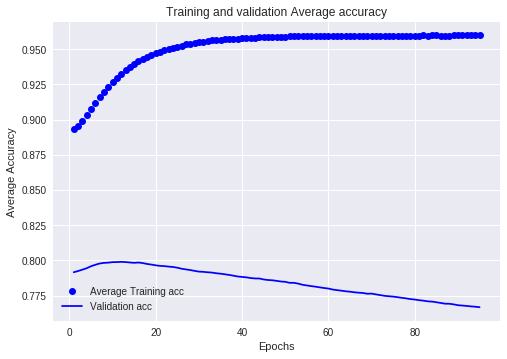

In [0]:
#  그래프를 좀더 보기 쉽게 만들기 위해서 수업시간에 배운 smooth_curve를 사용한다.
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_average_train_acc = smooth_curve(average_train_acc[5:])
smooth_average_val_acc = smooth_curve(average_val_acc[5:])
plt.plot(range(1, len(smooth_average_train_acc) + 1), smooth_average_train_acc, 'bo', label = 'Average Training acc')
plt.plot(range(1, len(smooth_average_val_acc) + 1), smooth_average_val_acc, 'b', label='Validation acc')
plt.title('Training and validation Average accuracy')
plt.xlabel('Epochs')
plt.ylabel('Average Accuracy')
plt.legend()
plt.show

* 그래프의 결과를 보면 10번째 epoch 이후로 과대 적합이 시작 된다. 10번째 epoch 모델을 불러 와서 test 데이터의 정확도를 계산한다.

In [0]:
# write a code here
best_model_path = ['/content/gdrive/My Drive/hw2_callbacks/hw2_model.0.10.hdf5',
                   '/content/gdrive/My Drive/hw2_callbacks/hw2_model.1.10.hdf5',
                   '/content/gdrive/My Drive/hw2_callbacks/hw2_model.2.10.hdf5',
                   '/content/gdrive/My Drive/hw2_callbacks/hw2_model.3.10.hdf5',
                   '/content/gdrive/My Drive/hw2_callbacks/hw2_model.4.10.hdf5',
                   '/content/gdrive/My Drive/hw2_callbacks/hw2_model.5.10.hdf5',
                   '/content/gdrive/My Drive/hw2_callbacks/hw2_model.6.10.hdf5',
                   '/content/gdrive/My Drive/hw2_callbacks/hw2_model.7.10.hdf5',
                   '/content/gdrive/My Drive/hw2_callbacks/hw2_model.8.10.hdf5',
                   '/content/gdrive/My Drive/hw2_callbacks/hw2_model.9.10.hdf5']
best_models = []
best_model_predictions = []
for i in range(len(best_model_path)):
  best_model_i = models.load_model(filepath=best_model_path[i])
  best_model.append(best_model_i)
  
  best_model_prediction = best_model_i.predict(x_test)
  best_model_predictions.append(best_model_prediction)

print(best_model_predictions)  

[array([[1.02339145e-05, 1.29869004e-04, 6.52811559e-06, ...,
        6.96512288e-05, 1.10757828e-05, 6.18530112e-06],
       [1.95409084e-05, 2.53263656e-02, 5.05303293e-02, ...,
        2.15553024e-04, 1.73723136e-04, 4.69277802e-05],
       [1.34294643e-03, 9.41598117e-01, 1.20212135e-04, ...,
        5.50377008e-04, 7.46728037e-05, 9.35031949e-06],
       ...,
       [3.86227948e-05, 8.74293910e-05, 8.07045399e-06, ...,
        5.08026023e-05, 7.95393044e-06, 5.14176054e-06],
       [1.14715088e-03, 1.67380333e-01, 1.24583940e-03, ...,
        2.25933851e-03, 9.50093730e-04, 2.73904356e-04],
       [1.39104650e-05, 8.85345161e-01, 6.92616508e-04, ...,
        1.39874275e-04, 4.37071896e-04, 2.33446713e-06]], dtype=float32), array([[2.12525865e-05, 7.02164602e-04, 6.44052780e-05, ...,
        5.09821111e-05, 5.17018316e-06, 1.41875571e-04],
       [5.27475365e-02, 7.75408223e-02, 1.42759923e-02, ...,
        1.79180724e-03, 1.34774426e-04, 4.03351760e-06],
       [1.33028487e-03, 9.

In [0]:
np.argmax(best_model_predictions[0][0])

3

In [0]:
best_model_predictions_argmax = 

In [0]:
! git clone https://github.com/JoSungHun/Deeplearning.git

Cloning into 'Deeplearning'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
